In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [82]:
house_rent = pd.read_csv('/Users/User/Kaggle Datasets/house_rent_prediction/House_Rent_Dataset.csv')
print(house_rent.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [83]:
house_rent.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2529,2022-06-18,3,12000,950,3 out of 5,Carpet Area,"Kotla, Mayur Vihar",Delhi,Semi-Furnished,Bachelors,2,Contact Owner
1970,2022-06-20,1,10000,600,1 out of 3,Super Area,Rajajinagar,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
3938,2022-05-06,3,30000,1450,9 out of 13,Carpet Area,"Chandanagar, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
1217,2022-06-16,1,40000,415,15 out of 22,Carpet Area,"Kanakia Rainforest, Andheri East",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Agent
2333,2022-04-29,1,8500,600,3 out of 5,Super Area,Sahakara Nagar,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner


**Checking null values or not**

In [84]:
# check 
house_rent.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**Checking duplicate data**

In [85]:
house_rent.duplicated().sum()

0

**Describe statistic dataset**

In [86]:
house_rent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Checking all columns dataset**

In [87]:
house_rent.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**Information about a dataset**

In [88]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**Looking check mean, median, modus**

In [89]:
print(f"Mean Rent: {house_rent.Rent.mean()}")
print(f"Median Rent: {house_rent.Rent.median()}")
print(f"Highest Rent: {house_rent.Rent.max()}")
print(f"Lowest Rent: {house_rent.Rent.min()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


**Bar Plot for Number of House in Each City which is Available for Rent**

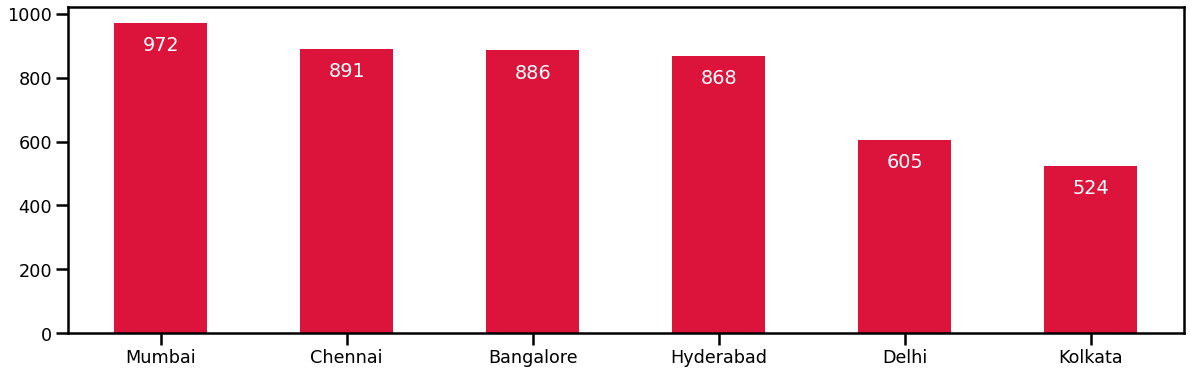

In [90]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = house_rent["City"].value_counts().plot(kind = 'bar', color = "crimson", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')

**look at the rent of the houses in different cities according to the furnishing status of the house**

In [91]:
import plotly.express as px
import plotly.graph_objects as go

figure = px.bar(house_rent, x=house_rent["City"], 
                y = house_rent["Rent"], 
                color = house_rent["Furnishing Status"],
            title="Rent in Different Cities According to Furnishing Status")
figure.show()

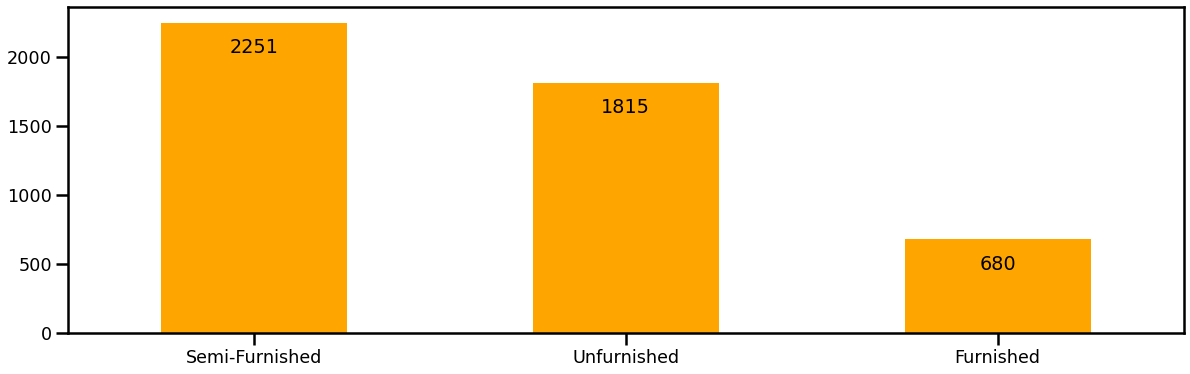

In [92]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = house_rent["Furnishing Status"].value_counts().plot(kind = 'bar', color = "Orange", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha = 'center', va = 'bottom', color = 'Black')

**Bar Plot on Different Types of Tenant Preferred**

In [93]:
figure = px.bar(house_rent, x=house_rent["City"], 
                y = house_rent["Rent"], 
                color = house_rent["Size"],
            title="Rent in Different Cities According to Size")
figure.show()

**Pie Plot on Cities to check the distribution**

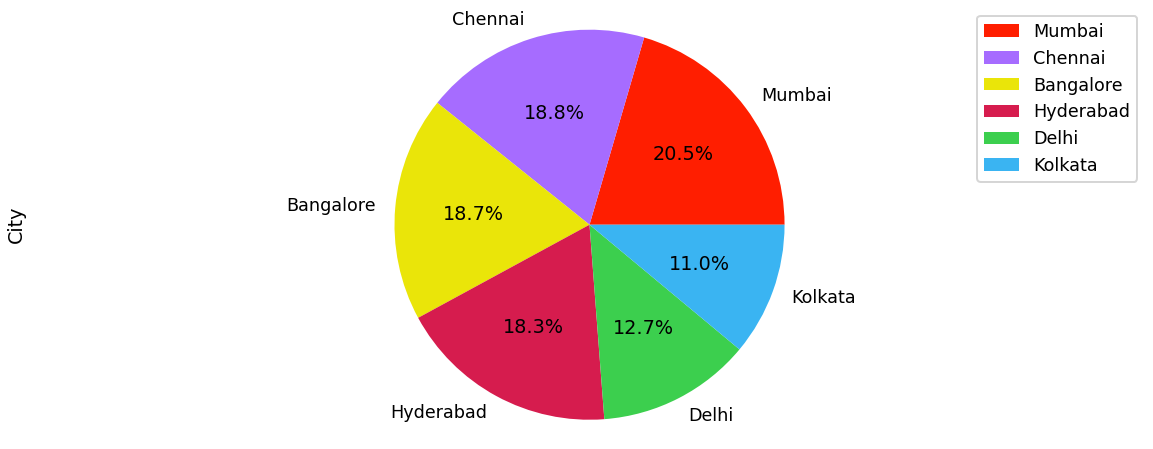

In [94]:
plt.figure(figsize = (20, 8))
counts = house_rent["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# **House rent model prediction**

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
house_rent["Area Type"] = house_rent["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
house_rent["City"] = house_rent["City"].map({"Mumbai": 4000, "Chennai": 6000, 
                                 "Bangalore": 5600, "Hyderabad": 5000, 
                                 "Delhi": 1100, "Kolkata": 7000})
house_rent["Furnishing Status"] = house_rent["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
house_rent["Tenant Preferred"] = house_rent["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})

print(house_rent.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2          1   
1  2022-05-13    2  20000   800       1 out of 3          1   
2  2022-05-16    2  17000  1000       1 out of 3          1   
3  2022-07-04    2  10000   800       1 out of 2          1   
4  2022-05-09    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel  7000                  0                 2   
1  Phool Bagan, Kankurgachi  7000                  1                 2   
2   Salt Lake City Sector 2  7000                  1                 2   
3               Dumdum Park  7000                  0                 2   
4             South Dum Dum  7000                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

In [97]:
from sklearn.model_selection import train_test_split
X = np.array(house_rent[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]])
y = np.array(house_rent[["Rent"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.1, 
                                                random_state=42)

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, 
               input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 128)            66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [99]:
X = X.astype(np.float32)

In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=21)

Epoch 1/21
4746/4746 [==============================] - 172s 33ms/step - loss: 7070200320.0000
Epoch 2/21
4746/4746 [==============================] - 161s 34ms/step - loss: 6431711744.0000
Epoch 3/21
4746/4746 [==============================] - 152s 32ms/step - loss: 6103068672.0000
Epoch 4/21
4746/4746 [==============================] - 165s 35ms/step - loss: 5932579840.0000
Epoch 5/21
4746/4746 [==============================] - 167s 35ms/step - loss: 5712100352.0000
Epoch 6/21
4746/4746 [==============================] - 163s 34ms/step - loss: 5587011584.0000
Epoch 7/21
4746/4746 [==============================] - 164s 35ms/step - loss: 5512082944.0000
Epoch 8/21
4746/4746 [==============================] - 162s 34ms/step - loss: 5464845312.0000
Epoch 9/21
4746/4746 [==============================] - 171s 36ms/step - loss: 5245635072.0000
Epoch 10/21
4746/4746 [==============================] - 165s 35ms/step - loss: 5122720768.0000
Epoch 11/21
4746/4746 [==========================

In [101]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 2
Size of the House: 5000
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 1
Pin Code of the City: 3
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 2
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 1
Number of bathrooms: 4
1/1 [==============================] - 5s 5s/step
Predicted House Price =  [[116671.8]]


# Summary #

Penggunaan machine learning yang tepat dalam memprediksi harga sewa rumah sangatlah membantu. Banyak platform sewa rumah yang menggunakan machine learning untuk memudahkan pekerjaan mereka dan para pelanggan. Para pelanggan bisa memilih rumah sesuai dengan kendisi dan pendapatan keuangan masing-masing.